## Применим к картинкам модель VGG16

In [2]:
'''Импорты для препроцессинга'''
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input

In [3]:
'''Импорты моделей'''
from keras.applications.vgg16 import VGG16 
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
'''Импорты базовых библиотек для обработки данных'''
import os
import numpy as np
from numpy import savetxt
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import cv2
import re
import csv
from tqdm import tqdm
import collections

In [5]:
'''Импорты для визуализации'''
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.transform import factor_cmap

In [6]:
'''Функция создает список shots, в котором лежат названия файлов кадров'''
def add_image_names_2_list(path):
    # change the working directory to the path where the images are located
    os.chdir(path)

    # this list holds all the image filename
    shots = []

    # creates a ScandirIterator aliased as files
    with os.scandir(path) as files:
      # loops through each file in the directory
        for file in files:
            if file.name.endswith('.jpg'):
              # adds only the image files to the flowers list
                shots.append(file.name)
    return shots

In [7]:
'''Features - признаки объекта, получение сжатия размерности. В данной функции мы загружаем изображение,
предобрабатываем его с помощью встроенных методов keras, изменяем размерность, потому что нейронная сеть работает
только с изображениями определенных форматов'''
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [8]:
'''Путь к нейронке'''
weights_path = '/Users/tonleon/Documents/GitHub/Diploma/vgg16_weights_tf_dim_ordering_tf_kernels.h5'

In [9]:
'''Загружаем модель'''
model = VGG16(weights = weights_path)
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

# Фильм 2012 года

In [46]:
# '''Чанк, чтобы переименовать файлы'''
# import os
# path = '/Users/tonleon/Desktop/Diploma/2013_1'
# files = [f for f in os.listdir(path) if f.endswith('.jpg')]
# files.sort(key=lambda file: int(re.sub('\D', '', file)))

# for index, file in enumerate(files):
#     os.rename(os.path.join(path, file), os.path.join(path, ''.join(['2013_1_', str(index), '.jpg'])))

In [9]:
'''Путь к кадрам фильма'''
path_2012 = '/Users/tonleon/Desktop/Diploma/2012'

In [8]:
def get_image_features(path, model):
    shots = add_image_names_2_list(path)
    shots.sort(key=lambda f: int(re.sub('\D', '', f)))
    data = {}

    for shot in tqdm(shots):
        feat = extract_features(shot, model)
        data[shot] = feat

    filenames = np.array(list(data.keys()))

# get a list of just the features
    feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
    feat = feat.reshape(-1,4096)
    
    return data, feat, filenames

## Получение и сохранение даты

In [11]:
'''Энергозатратный чанк, изменяет размерность каждого фрейма'''
data, feat, filenames = get_image_features(path_2012, model)

100%|██████████| 7764/7764 [48:52<00:00,  2.65it/s]  


In [13]:
data

{'2012_1_0.jpg': array([[0.        , 0.4107028 , 0.21805173, ..., 0.        , 0.        ,
         0.2684068 ]], dtype=float32),
 '2012_1_1.jpg': array([[0.        , 0.1908282 , 0.        , ..., 0.        , 0.        ,
         0.22497135]], dtype=float32),
 '2012_1_2.jpg': array([[0.        , 0.        , 1.1192353 , ..., 0.        , 0.18508267,
         3.2226446 ]], dtype=float32),
 '2012_1_3.jpg': array([[0.        , 0.        , 0.        , ..., 0.17211333, 0.78752136,
         3.0966556 ]], dtype=float32),
 '2012_1_4.jpg': array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         3.9876573]], dtype=float32),
 '2012_1_5.jpg': array([[0.        , 0.        , 0.        , ..., 0.11643493, 1.0038762 ,
         4.224899  ]], dtype=float32),
 '2012_1_6.jpg': array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         4.3104844]], dtype=float32),
 '2012_1_7.jpg': array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         4.2549367]], dt

In [15]:
savetxt('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2012/Feat_2012.csv', feat, delimiter=',')

In [21]:
data

{'2012_1_0.jpg': array([[0.        , 0.4107028 , 0.21805173, ..., 0.        , 0.        ,
         0.2684068 ]], dtype=float32),
 '2012_1_1.jpg': array([[0.        , 0.1908282 , 0.        , ..., 0.        , 0.        ,
         0.22497135]], dtype=float32),
 '2012_1_2.jpg': array([[0.        , 0.        , 1.1192353 , ..., 0.        , 0.18508267,
         3.2226446 ]], dtype=float32),
 '2012_1_3.jpg': array([[0.        , 0.        , 0.        , ..., 0.17211333, 0.78752136,
         3.0966556 ]], dtype=float32),
 '2012_1_4.jpg': array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         3.9876573]], dtype=float32),
 '2012_1_5.jpg': array([[0.        , 0.        , 0.        , ..., 0.11643493, 1.0038762 ,
         4.224899  ]], dtype=float32),
 '2012_1_6.jpg': array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         4.3104844]], dtype=float32),
 '2012_1_7.jpg': array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         4.2549367]], dt

In [14]:
def save_files_and_features_to_csv(data, year_folder, year_file):
    pd.DataFrame(np.concatenate(list(data.values())), index=data.keys()).to_csv("/Users/tonleon/Documents/GitHub/Diploma/Films/Data/{}/Features_{}.csv".format(year_folder, year_file))

In [31]:
save_files_and_features_to_csv(data, 2012, 2012)

In [24]:
'''С помощью PCA еще раз изменяем размерность матрицы'''
pca = PCA(n_components=150, random_state=22)
pca.fit(feat)
pca_result = pca.transform(feat)

In [26]:
'''Опять сохраняю'''
savetxt('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2012/PCA_2012.csv', pca_result, delimiter=',')

In [282]:
pca_result.shape

(7764, 150)

## Загрузка и обработка даты

In [9]:
'''В x лежат результаты работы PCA'''
with open('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2012/PCA_2012.csv', newline='') as csvfile:
    pca_result_2012 = np.array(list(csv.reader(csvfile)))

In [18]:
'''Загружаю ранее сохраненные признаки кадров фильма 2012 года, в filenemaes - array с краткими названиями кадров'''
Features_2012 = pd.read_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2012/Features_2012.csv', header = None)
filenames_2012 = np.array(list(Features_2012[0][1:]))

In [19]:
filenames_2012

array(['2012_1_0.jpg', '2012_1_1.jpg', '2012_1_2.jpg', ...,
       '2012_1_7761.jpg', '2012_1_7762.jpg', '2012_1_7763.jpg'],
      dtype='<U15')

In [8]:
'''Смотрим, какое количество кластеров является наиболее оптимальным для работы с KMeans'''
cluster_range = range(5, 70, 5)

def find_best_k_for_kmeans(cluster_range, pca_result, verbose=True):
    inertias = []
    for n_clusters in cluster_range:
        if verbose:
            print('Working on clusters number equal to {}...'.format(n_clusters))
        kmeans = KMeans(n_clusters=n_clusters,n_jobs=-1, random_state=22)
        kmeans.fit(pca_result)
        inertias.append(kmeans.inertia_)
    plt.style.use('ggplot')
    plt.scatter(cluster_range, inertias)
    plt.xticks(cluster_range)
    plt.show()

Working on clusters number equal to 5...
Working on clusters number equal to 10...
Working on clusters number equal to 15...
Working on clusters number equal to 20...
Working on clusters number equal to 25...
Working on clusters number equal to 30...
Working on clusters number equal to 35...
Working on clusters number equal to 40...
Working on clusters number equal to 45...
Working on clusters number equal to 50...
Working on clusters number equal to 55...
Working on clusters number equal to 60...
Working on clusters number equal to 65...


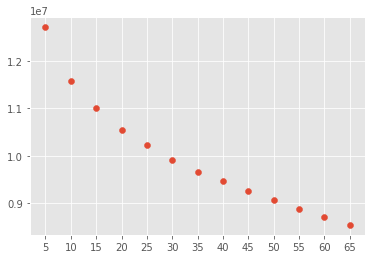

In [14]:
find_best_k_for_kmeans(cluster_range, pca_result_2012)

Судя по нашему графику, лучшее значение гиперпараметра k в kmeans - между 10 и 15

In [22]:
'''Разделяю на кластеры'''
def separate_frames_2_clusters(pca_result, filenames, N=10):
    kmeans = KMeans(n_clusters=N, n_jobs=-1, random_state=22)
    kmeans.fit(pca_result)
    
    '''Создаю словарь, в котором указано, в какой кластер/группу какой кадр попал'''
    groups = {}
    for file, cluster in zip(filenames, kmeans.labels_):
        if cluster not in groups.keys():
            groups[cluster] = []
            groups[cluster].append(file)
        else:
            groups[cluster].append(file)
    '''Вместо кратких названий из filenames делаю просто номера кадров, в будущем это будет ось x'''
    graph_axes = {int(value[:value.find('_')]): key for key in groups.keys() for value in groups[key]}
    '''В ключах - номер фрейма, в значениях - номер кластера, и все отсортировано по номерам кадров'''
    graph_axes_ordered = dict(sorted(graph_axes.items()))
    
    return groups, graph_axes_ordered, kmeans

In [10]:
'''Строю гистограммы распределения кадров по кластерам, по x - номера кадров, по y - их количество в определенном
кластере'''

def plot_hist_of_cluster_distribution(groups, kmeans, n_of_subplots=10, bins_num=10):
        bins_num = bins_num
        fig, plots = plt.subplots(n_of_subplots, 1, figsize=(30, 150))
        for i in range(n_of_subplots):
            plots[i].hist([int(key[:key.find('_')]) for key in groups[i]], bins=np.linspace(0, len(kmeans.labels_),  bins_num))
            plots[i].set_title('Cluster {}'.format(i))
            plots[i].set_xlabel('Frame index', fontsize=20)
        plt.show()

In [11]:
'''Функция, с помощью которой можно просто вывести кадры, попавшие в определенный кластер, горизонтально, без
построения каких-либо графиков'''
def showImagesHorizontally(list_of_imgs_names, 
                           img_size=(440, 440),
                           folder_path='/Users/tonleon/Documents/GitHub/Diploma/Films/2012_frames/'):
    list_of_array_imgs = [cv2.imread(folder_path + img_name) for img_name in list_of_imgs_names]
    fig = plt.figure(figsize=img_size)
    columns = 6
    rows = 20
    for i, image in enumerate(list_of_array_imgs):
        ax = fig.add_subplot(rows, columns, i+1)
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb, cmap='Greys_r')
        plt.axis('off')
    plt.show()

In [23]:
groups_2012, _, kmeans_2012 = separate_frames_2_clusters(pca_result_2012, filenames_2012)

In [26]:
groups_2012

{4: ['2012_1_0.jpg',
  '2012_1_1.jpg',
  '2012_1_12.jpg',
  '2012_1_13.jpg',
  '2012_1_14.jpg',
  '2012_1_15.jpg',
  '2012_1_16.jpg',
  '2012_1_17.jpg',
  '2012_1_18.jpg',
  '2012_1_19.jpg',
  '2012_1_20.jpg',
  '2012_1_21.jpg',
  '2012_1_22.jpg',
  '2012_1_23.jpg',
  '2012_1_24.jpg',
  '2012_1_25.jpg',
  '2012_1_26.jpg',
  '2012_1_27.jpg',
  '2012_1_28.jpg',
  '2012_1_29.jpg',
  '2012_1_30.jpg',
  '2012_1_31.jpg',
  '2012_1_32.jpg',
  '2012_1_33.jpg',
  '2012_1_34.jpg',
  '2012_1_35.jpg',
  '2012_1_36.jpg',
  '2012_1_37.jpg',
  '2012_1_38.jpg',
  '2012_1_39.jpg',
  '2012_1_40.jpg',
  '2012_1_41.jpg',
  '2012_1_79.jpg',
  '2012_1_80.jpg',
  '2012_1_81.jpg',
  '2012_1_1171.jpg',
  '2012_1_2069.jpg',
  '2012_1_2070.jpg',
  '2012_1_2071.jpg',
  '2012_1_3045.jpg',
  '2012_1_3761.jpg',
  '2012_1_3762.jpg',
  '2012_1_3764.jpg',
  '2012_1_3984.jpg',
  '2012_1_3985.jpg',
  '2012_1_3986.jpg',
  '2012_1_3991.jpg',
  '2012_1_4144.jpg',
  '2012_1_4145.jpg',
  '2012_1_4436.jpg',
  '2012_1_6897.jpg'

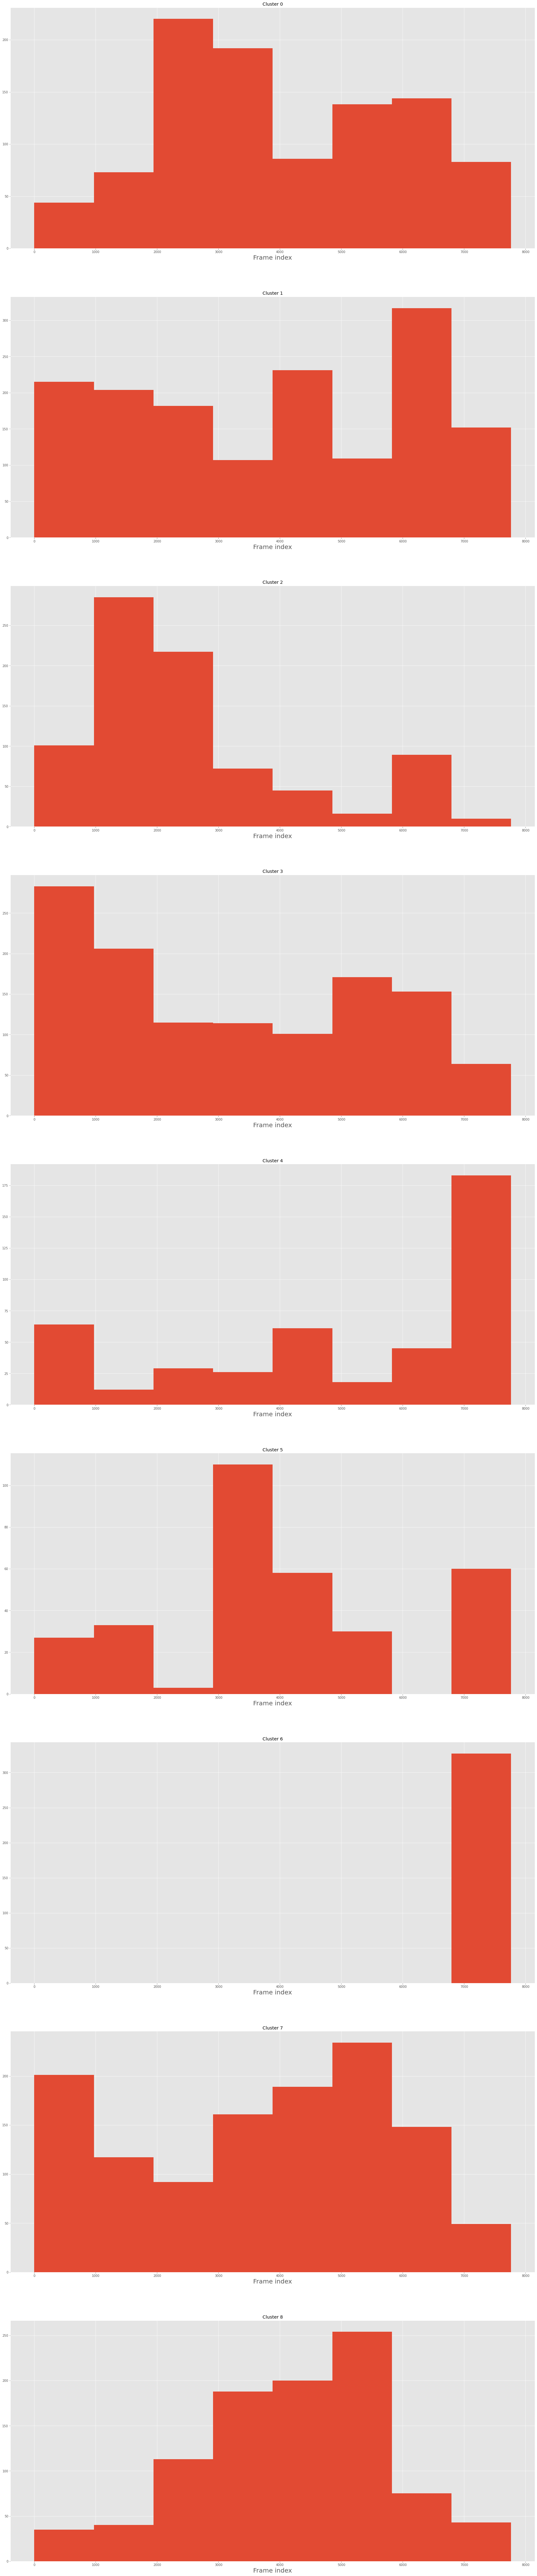

In [19]:
plot_hist_of_cluster_distribution(groups_2012, kmeans_2012, n_of_subplots=9, bins_num=9)

In [12]:
'''По оси x - названия кластеров, по оси y - номера кадров, видно, что в 4 кластер, гистограмма которого есть
в т.ч. выше и котороая отличается от других, поскольку она состоит лишь из одного столбца, попали титры, это
черный кластер. Кластер 1 оказывется кластером съемок на природе, он очень светлый, туда попали кадры зимние и
летние'''

def visualize_clusters(graph_axes_ordered, src, title_of_plot, each_n_frame=10):
    output_notebook()

    df = pd.DataFrame(data={'frame_num':list(graph_axes_ordered.keys())[::each_n_frame], 
                            'cluster_num':list(graph_axes_ordered.values())[::each_n_frame], 
                            'desc':list(graph_axes_ordered.keys())[::each_n_frame],
                            'imgs':src[::each_n_frame],
                            'fonts' : ['<i>preview</i>'] * len(src[::each_n_frame])
                             })
    colors =  {0:'firebrick', 
               1:'rosybrown',
               2:'royalblue',
               3:'black',
               4:'pink',
               5:'sandybrown',
               6:'seagreen',
              7:'gold',
              8:'orchid',
              9:'olive',
              10:'darkcyan',
              11:'darkorange',
              12:'hotpink',
              13:'greenyellow',
              14:'slategray'}

    df["colors"] = df["cluster_num"].apply(lambda c: colors[c])

    output_notebook()
    source = ColumnDataSource(data=df)
    TOOLTIPS = """
        <div>
            <div>
                <img
                    src="@imgs" height="187" alt="@imgs" width=333""
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>

            </div>
            <div>
                <span>@fonts{safe}</span>
            </div>
            <div>
                <span style="font-size: 15px;">Location</span>
                <span style="font-size: 10px; color: #696;  alpha: 0.25">($x, $y)</span>
            </div>
        </div>
    """
    p = figure(plot_width=1000, plot_height=600, tooltips=TOOLTIPS,
               title=title_of_plot)

    p.circle(x='frame_num', y='cluster_num', color='colors', source=source, size=15, fill_alpha=0.5, alpha=0.2)

    show(p)

In [21]:
'''Более полные пути к нашим кадрам, чтобы мы могли их выводить на графике'''
src_2012 = ['2012_frames/{}_frame.jpg'.format(i) for i in graph_axes_ordered_2012.keys()] 
visualize_clusters(graph_axes_ordered_2012, src_2012, "Anna Karenina 2012")

Loading BokehJS ...

Loading BokehJS ...

### Изображение кластеров на одной прямой

In [13]:
def visualize_clusters_in_line(graph_axes_ordered, src, title_of_plot, each_n_frame=30):
    df = pd.DataFrame(data={'frame_num':list(graph_axes_ordered.keys())[::each_n_frame], 
                            'cluster_num':list(graph_axes_ordered.values())[::each_n_frame], 
                            'desc':list(graph_axes_ordered.keys())[::each_n_frame],
                            'imgs':src[::each_n_frame],
                            'fonts' : ['<i>preview</i>'] * len(src[::each_n_frame]),
                             'y':[0] * len(list(graph_axes_ordered.keys())[::each_n_frame])})
    colors =  {0:'firebrick', 
               1:'rosybrown',
               2:'royalblue',
               3:'black',
               4:'pink',
               5:'sandybrown',
               6:'seagreen',
              7:'gold',
              8:'orchid',
              9:'olive',
              10:'darkcyan',
              11:'darkorange',
              12:'hotpink',
              13:'greenyellow',
              14:'slategray'}

    df["colors"] = df["cluster_num"].apply(lambda c: colors[c])

    output_notebook()
    source = ColumnDataSource(data=df)
    TOOLTIPS = """
        <div>
            <div>
                <img
                    src="@imgs" height="187" alt="@imgs" width=333""
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>

            </div>
            <div>
                <span>@fonts{safe}</span>
            </div>
            <div>
                <span style="font-size: 15px;">Location</span>
                <span style="font-size: 10px; color: #696;  alpha: 0.25">($x, $y)</span>
            </div>
        </div>
    """
    p = figure(plot_width=2000, plot_height=400, tooltips=TOOLTIPS,
               title=title_of_plot)

    p.circle(x='frame_num', y='y', color='colors', source=source, size=15, fill_alpha=0.5, alpha=0.2)

    show(p)

In [32]:
visualize_clusters_in_line(graph_axes_ordered_2012, src_2012, "Anna Karenina 2012", each_n_frame=60)

Loading BokehJS ...

# Фильм 1967

## Получение даты

In [33]:
path_1967 = '/Users/tonleon/Desktop/Diploma/1967'
'''Путь к кадрам фильма'''
data_1967, feat_1967, filenames_1967 = get_image_features(path_1967, model)

100%|██████████| 8552/8552 [1:56:24<00:00,  1.22it/s]     


In [34]:
save_files_and_features_to_csv(data_1967, 1967, 1967)

In [28]:
with open("/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1967/Features_1967.csv", "w") as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in data_1967.items():
        writer.writerow([key, value])   

In [29]:
pca_1967 = PCA(n_components=150, random_state=22)
pca_1967.fit(feat_1967)
pca_result_1967 = pca_1967.transform(feat_1967)

In [30]:
'''Опять сохраняю'''
savetxt('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1967/PCA_1967.csv', pca_result_1967, delimiter=',')

## Работа с датой

In [22]:
with open('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1967/PCA_1967.csv', newline='') as csvfile:
    pca_result_1967 = np.array(list(csv.reader(csvfile)))

In [23]:
Features_1967 = pd.read_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1967/Features_1967.csv', header = None)
filenames_1967 = np.array(list(Features_1967[0]))

Working on clusters number equal to 5...
Working on clusters number equal to 10...
Working on clusters number equal to 15...
Working on clusters number equal to 20...
Working on clusters number equal to 25...
Working on clusters number equal to 30...
Working on clusters number equal to 35...
Working on clusters number equal to 40...
Working on clusters number equal to 45...
Working on clusters number equal to 50...
Working on clusters number equal to 55...
Working on clusters number equal to 60...
Working on clusters number equal to 65...


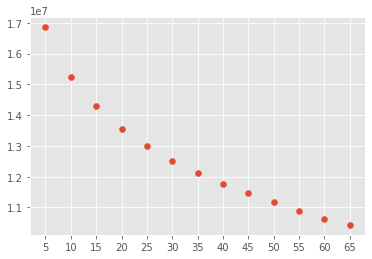

In [322]:
cluster_range = range(5, 70, 5)
find_best_k_for_kmeans(cluster_range, pca_result_1967)

In [24]:
groups_1967, graph_axes_ordered_1967, kmeans_1967 = separate_frames_2_clusters(pca_result_1967, filenames_1967, N=9)

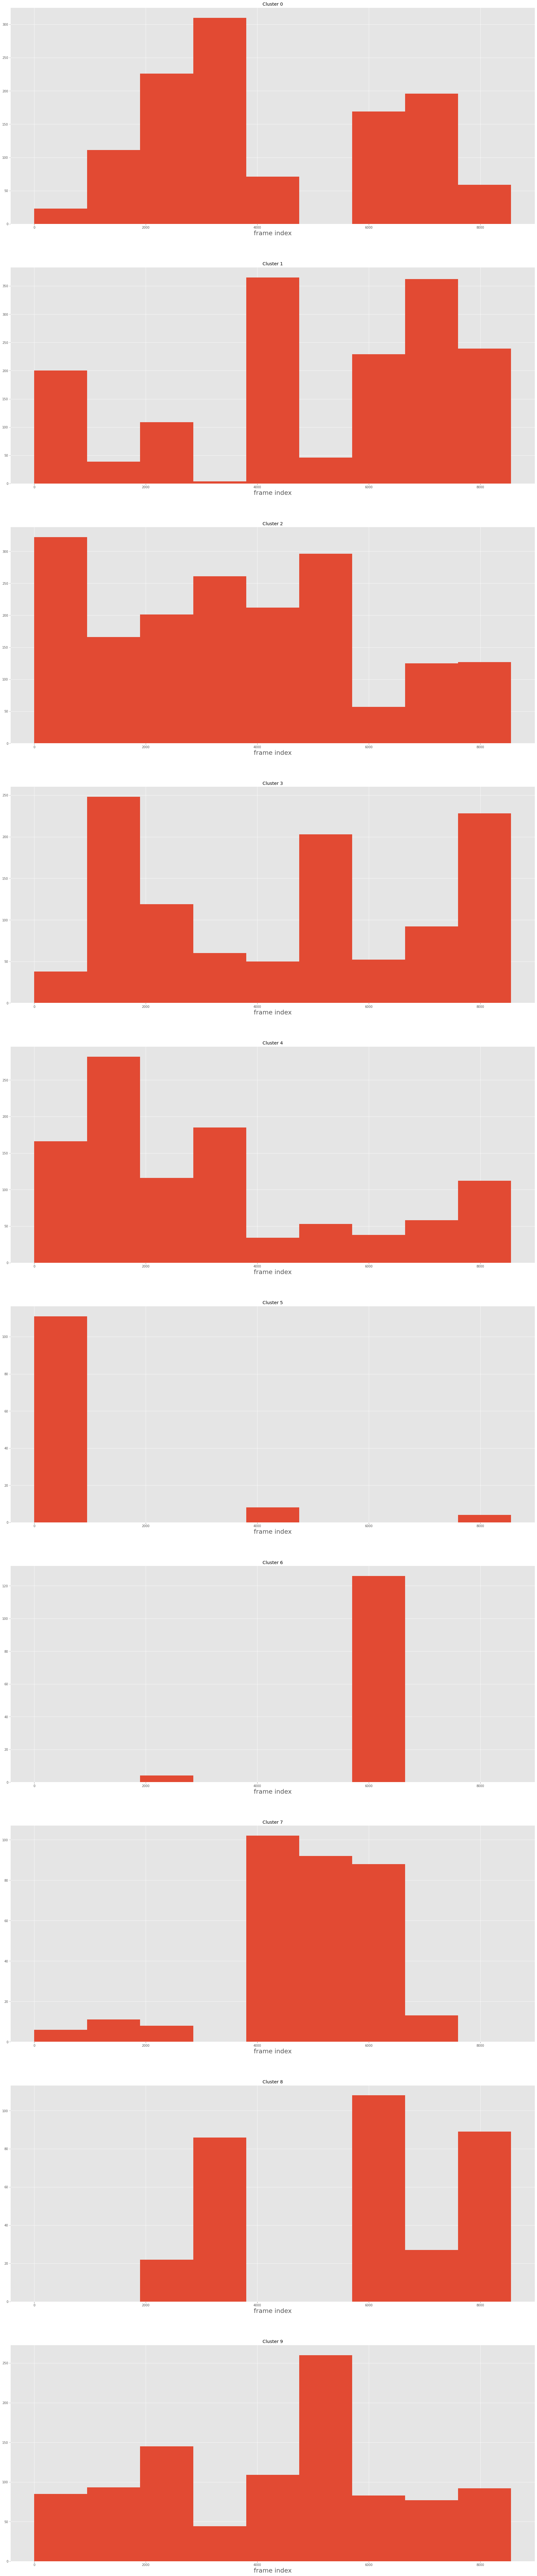

In [327]:
plot_hist_of_cluster_distribution(groups_1967, kmeans_1967, n_of_subplots=9)

In [25]:
src_1967 = ['1967_frames/{}_frame.jpg'.format(i) for i in graph_axes_ordered_1967.keys()] 
visualize_clusters(graph_axes_ordered_1967, src_1967, "Anna Karenina 1967")

Loading BokehJS ...

Loading BokehJS ...

In [26]:
visualize_clusters_in_line(graph_axes_ordered_1967, src_1967, "Anna Karenina 1967", each_n_frame=30)

NameError: name 'visualize_clusters_in_line' is not defined

# Фильм 1997

##   Сохранение даты

In [35]:
path_1997 = '/Users/tonleon/Desktop/Diploma/1997'

In [36]:
data_1997, feat_1997, filenames_1997 = get_image_features(path_1997, model)

100%|██████████| 6468/6468 [44:17<00:00,  2.43it/s]   


In [37]:
save_files_and_features_to_csv(data_1997, 1997, 1997)

In [50]:
with open("/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1997/Features_1997.csv", "w") as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in data_1997.items():
        writer.writerow([key, value])  

In [52]:
pca_1997 = PCA(n_components=150, random_state=22)
pca_1997.fit(feat_1997)
pca_result_1997 = pca_1997.transform(feat_1997)

In [53]:
savetxt('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1997/PCA_1997.csv', pca_result_1997, delimiter=',')

## Работа с датой

In [27]:
with open('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1997/PCA_1997.csv', newline='') as csvfile:
    pca_result_1997 = np.array(list(csv.reader(csvfile)))
Features_1997 = pd.read_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1997/Features_1997.csv', header = None)
filenames_1997 = np.array(list(Features_1997[0]))

Working on clusters number equal to 5...
Working on clusters number equal to 10...
Working on clusters number equal to 15...
Working on clusters number equal to 20...
Working on clusters number equal to 25...
Working on clusters number equal to 30...
Working on clusters number equal to 35...
Working on clusters number equal to 40...
Working on clusters number equal to 45...
Working on clusters number equal to 50...
Working on clusters number equal to 55...
Working on clusters number equal to 60...
Working on clusters number equal to 65...


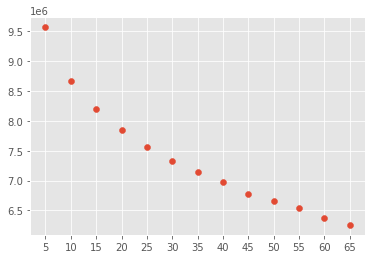

In [81]:
cluster_range = range(5, 70, 5)
find_best_k_for_kmeans(cluster_range, pca_result_1997)

In [28]:
groups_1997, graph_axes_ordered_1997, kmeans_1997 = separate_frames_2_clusters(pca_result_1997, filenames_1997, N=9)

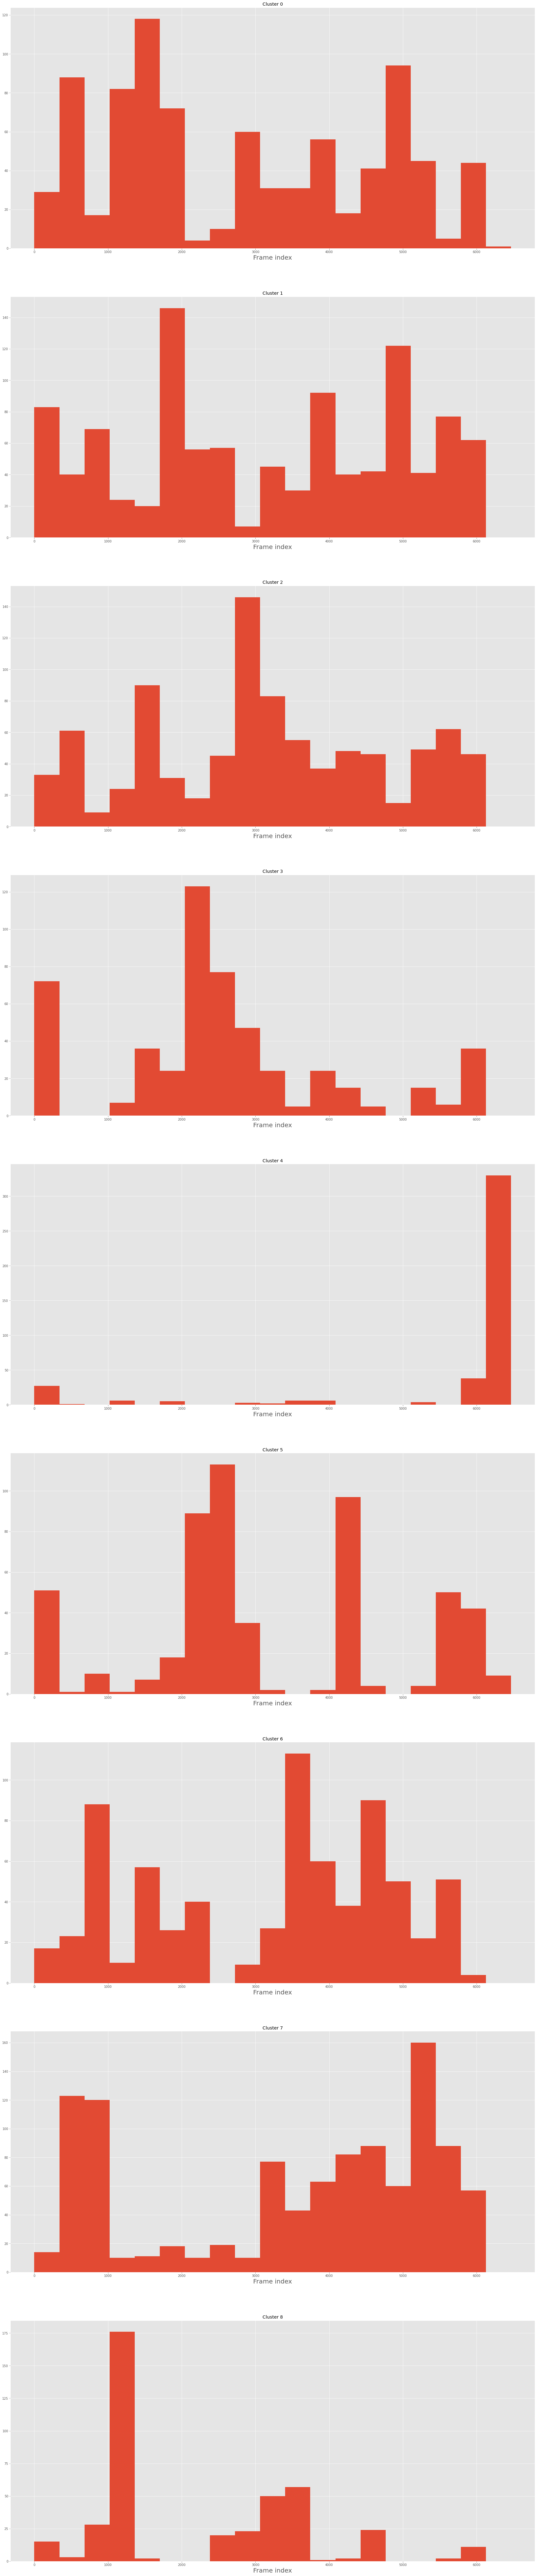

In [83]:
plot_hist_of_cluster_distribution(groups_1997, kmeans_1997, n_of_subplots=9, bins_num=20)

In [29]:
src_1997 = ['1997_frames/{}_frame.jpg'.format(i) for i in graph_axes_ordered_1997.keys()] 
visualize_clusters(graph_axes_ordered_1997, src_1997, "Anna Karenina 1997", 20)

Loading BokehJS ...

Loading BokehJS ...

In [30]:
visualize_clusters_in_line(graph_axes_ordered_1997, src_1997, "Anna Karenina 1997", each_n_frame=14)

NameError: name 'visualize_clusters_in_line' is not defined

#   Предобработка сериалов

In [33]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

In [35]:
def cut_film(directory, start_time_in_sec, end_time_in_sec):
    for file in os.listdir(directory):
        if file.endswith('.mp4') or file.endswith('.mkv') or file.endswith('.avi'):
            ffmpeg_extract_subclip(directory + '/' + file, start_time_in_sec, end_time_in_sec, 
                                   targetname = directory + '/cut_series/'+ file)

In [519]:
directory_soloviev = '/Users/tonleon/Desktop/Films/Soloviev'
cut_film(directory_soloviev, 70, 3023)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [36]:
def cut_films_in_directory(directory, film_2_cut_start_end):
    for file in os.listdir(directory):
        if file.endswith('.mp4') or file.endswith('.mkv') or file.endswith('.avi'):
            start_time_in_sec, end_time_in_sec = film_2_cut_start_end[file]
            ffmpeg_extract_subclip(directory + '/' + file, start_time_in_sec, end_time_in_sec, 
                                   targetname = directory + '/cut_series/'+ file)

In [530]:
directory_shahnazarov = '/Users/tonleon/Desktop/Films/Shahnazarov'
series_start_end_in_min_sec = [
    [(1, 11), (42, 43)],
    [(1, 42), (42, 7)],
    [(1, 53), (41, 39)],
    [(1, 50), (41, 2)],
    [(1, 36), (44, 24)],
    [(1, 39), (46, 18)],
    [(1, 24), (44, 10)],
    [(1, 25), (44, 0)]
]

shahnazarov_series_2_time_start_end = {}
for i, (start, end) in enumerate(series_start_end_in_min_sec):
    start_time = start[0]  * 60 + start[1]
    end_time = end[0]  * 60 + end[1]
    shahnazarov_series_2_time_start_end['Anna_0{}.mkv'.format(i + 1)] = (start_time, end_time)

In [531]:
cut_films_in_directory(directory_shahnazarov, shahnazarov_series_2_time_start_end)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [37]:
def extract_every_k_second_frame_from_series(path_to_video, path_to_folder, film_name, k: int, start_frame_index=0, series_num='', num_frames_per_sec=24):
    '''Функция отвечает за вычленение первого кадра каждой n-ной секунды (кадров т.о. становится меньше, 
    k - это номер секунды).
    Проблема: есть все-таки монтажные черные склейки, и n-ные секунды могут выпадать на них, из-за чего кадры
    могут получаться не очень качественными. Возможно, этого не будет заметно, или же количество черных кадров
    будет минимальным'''
    
    vidcap = cv2.VideoCapture(path_to_video)
    success,image = vidcap.read()
    count = start_frame_index * num_frames_per_sec * k
    
    if series_num != '':
        series_num = '_' + str(series_num)
        
    while success:
        success,image = vidcap.read()
        if count % (num_frames_per_sec * k) == 0:
#             cv2.imwrite(path_to_folder + str(film_name) + '_' + str(series_num) +"_{}.jpg".format(count // (num_frames_per_sec * k)), image)  
            cv2.imwrite('{}/{}{}_{}.jpg'.format(path_to_folder,
                                                 film_name,
                                                 series_num,
                                                 count // (num_frames_per_sec * k)), image)  
        count += 1
    return print('done')

In [534]:
extract_every_k_second_frame('/Users/tonleon/Desktop/Films/Karenina_Italian/Anna Karenina E02.avi', 
                             '/Users/tonleon/Desktop/Films/Karenina_Italian/2013_frames', 1, start_frame_index=5880, num_frames_per_sec=24)

done


In [559]:
extract_every_k_second_frame_from_series('/Users/tonleon/Desktop/Films/Shahnazarov/cut_series/Anna_08.mkv',
                             '/Users/tonleon/Desktop/Films/Shahnazarov/2017_frames', 
                             2017, 1, 0, 8)

done


# 2009 год

In [12]:
path_2009 = '/Users/tonleon/Desktop/Diploma/2009'
data_2009, feat_2009, filenames_2009 = get_image_features(path_2009, model)

100%|██████████| 15340/15340 [1:58:28<00:00,  2.16it/s]     


In [15]:
save_files_and_features_to_csv(data_2009, 2009, 2009)

In [561]:
with open("/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2009/Features_2009.csv", "w") as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in data_2009.items():
        writer.writerow([key, value])  

In [564]:
pca_2009 = PCA(n_components=150, random_state=22)
pca_2009.fit(feat_2009)
pca_result_2009 = pca_2009.transform(feat_2009)

savetxt('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2009/PCA_2009.csv', pca_result_2009, delimiter=',')

In [17]:
with open('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2009/PCA_2009.csv', newline='') as csvfile:
    pca_result_2009 = np.array(list(csv.reader(csvfile)))

In [18]:
Features_2009 = pd.read_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2009/Features_2009.csv', header = None)
filenames_2009 = np.array(list(Features_2009[0]))

Working on clusters number equal to 5...
Working on clusters number equal to 10...
Working on clusters number equal to 15...
Working on clusters number equal to 20...
Working on clusters number equal to 25...
Working on clusters number equal to 30...
Working on clusters number equal to 35...
Working on clusters number equal to 40...
Working on clusters number equal to 45...
Working on clusters number equal to 50...
Working on clusters number equal to 55...
Working on clusters number equal to 60...
Working on clusters number equal to 65...


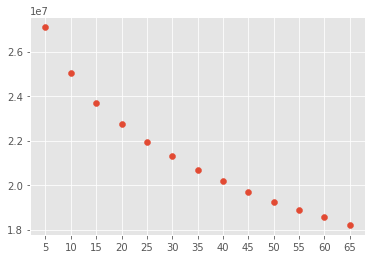

In [566]:
cluster_range = range(5, 70, 5)
find_best_k_for_kmeans(cluster_range, pca_result_2009)

In [19]:
kmeans = KMeans(n_clusters=10, n_jobs=-1, random_state=22)
kmeans.fit(pca_result_2009)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [21]:
groups_2009 = {}
for file, cluster in zip(filenames_2009, kmeans.labels_):
    if cluster not in groups_2009.keys():
        groups_2009[cluster] = []
        groups_2009[cluster].append(file)
    else:
        groups_2009[cluster].append(file)

In [22]:
groups_2009

{5: ['2009_1_0.jpg',
  '2009_1_1.jpg',
  '2009_2_0.jpg',
  '2009_2_1.jpg',
  '2009_2_2.jpg',
  '2009_2_3.jpg',
  '2009_2_4.jpg',
  '2009_2_5.jpg',
  '2009_2_6.jpg',
  '2009_2_7.jpg',
  '2009_2_8.jpg',
  '2009_2_9.jpg',
  '2009_3_0.jpg',
  '2009_3_1.jpg',
  '2009_3_2.jpg',
  '2009_3_3.jpg',
  '2009_3_4.jpg',
  '2009_3_5.jpg',
  '2009_3_6.jpg',
  '2009_3_7.jpg',
  '2009_3_8.jpg',
  '2009_4_0.jpg',
  '2009_4_1.jpg',
  '2009_4_2.jpg',
  '2009_4_3.jpg',
  '2009_5_0.jpg',
  '2009_5_1.jpg',
  '2009_5_2.jpg',
  '2009_5_3.jpg',
  '2009_5_4.jpg',
  '2009_5_5.jpg',
  '2009_5_6.jpg',
  '2009_5_7.jpg',
  '2009_5_8.jpg',
  '2009_1_23.jpg',
  '2009_1_24.jpg',
  '2009_1_25.jpg',
  '2009_1_26.jpg',
  '2009_1_27.jpg',
  '2009_1_28.jpg',
  '2009_3_24.jpg',
  '2009_4_98.jpg',
  '2009_4_99.jpg',
  '2009_1_486.jpg',
  '2009_1_487.jpg',
  '2009_1_488.jpg',
  '2009_1_489.jpg',
  '2009_1_490.jpg',
  '2009_1_491.jpg',
  '2009_1_492.jpg',
  '2009_1_493.jpg',
  '2009_1_494.jpg',
  '2009_1_495.jpg',
  '2009_1_496.

In [25]:
'''Вместо кратких названий из filenames делаю просто номера кадров, в будущем это будет ось x'''
frames_nums_and_clusters_2009 = [(value, key) for key in groups_2009.keys() for value in groups_2009[key]]


def frames_and_clusters_of_exact_series(frames_nums_and_clusters, N:str):
    sorted_graph_axes = dict(sorted({int(frame[frame.rfind('_') + 1: -4]):cluster 
                                 for frame, cluster in frames_nums_and_clusters
                                 if '_' + N + '_' in frame}.items()))
    return sorted_graph_axes
    

In [26]:
sorted_graph_axes_2009_1 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2009, '1')
sorted_graph_axes_2009_2 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2009, '2')
sorted_graph_axes_2009_3 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2009, '3')
sorted_graph_axes_2009_4 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2009, '4')
sorted_graph_axes_2009_5 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2009, '5')


In [40]:
src_2009_1 = ['2009_frames/2009_1_{}.jpg'.format(i) for i in sorted_graph_axes_2009_1.keys()]
src_2009_2 = ['2009_frames/2009_2_{}.jpg'.format(i) for i in sorted_graph_axes_2009_2.keys()]
src_2009_3 = ['2009_frames/2009_3_{}.jpg'.format(i) for i in sorted_graph_axes_2009_3.keys()]
src_2009_4 = ['2009_frames/2009_4_{}.jpg'.format(i) for i in sorted_graph_axes_2009_4.keys()]
src_2009_5 = ['2009_frames/2009_5_{}.jpg'.format(i) for i in sorted_graph_axes_2009_5.keys()]

In [41]:
output_notebook()

first_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2009_1.keys()),
    y= np.array(list(sorted_graph_axes_2009_1.values()))-0.2,
    desc=list(sorted_graph_axes_2009_1.keys()),
    imgs=src_2009_1,
    fonts = ['<i>1 episode</i>'] * len(src_2009_1)
))

second_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2009_2.keys()),
    y= np.array(list(sorted_graph_axes_2009_2.values()))-0.1,
    desc=list(sorted_graph_axes_2009_2.keys()),
    imgs=src_2009_2,
    fonts = ['<i>2 episode</i>'] * len(src_2009_2)
))

third_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2009_3.keys()),
    y= np.array(list(sorted_graph_axes_2009_3.values())),
    desc=list(sorted_graph_axes_2009_3.keys()),
    imgs=src_2009_3,
    fonts = ['<i>3 episode</i>'] * len(src_2009_3)
))

forth_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2009_4.keys()),
    y= np.array(list(sorted_graph_axes_2009_4.values()))+0.1,
    desc=list(sorted_graph_axes_2009_4.keys()),
    imgs=src_2009_4,
    fonts = ['<i>4 episode</i>'] * len(src_2009_4)
))

fifth_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2009_5.keys()),
    y= np.array(list(sorted_graph_axes_2009_5.values()))+0.2,
    desc=list(sorted_graph_axes_2009_5.keys()),
    imgs=src_2009_5,
    fonts = ['<i>5 episode</i>'] * len(src_2009_5)
))

TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="187" alt="@imgs" width=333""
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
        </div>
        <div>
            <span style="font-size: 15px;">@fonts{safe}</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;  alpha: 0.25">($x, $y)</span>
        </div>
    </div>
"""

p = figure(plot_width=1000, plot_height=1000, tooltips=TOOLTIPS,
           title="Anna Karenina 2009")

p.circle('x', 'y', size=10, alpha=0.2, color='green', source=first_series)
p.circle('x', 'y', size=10, alpha=0.2, color='red', source=second_series)
p.circle('x', 'y', size=10, alpha=0.2, color='blue', source=third_series)
p.circle('x', 'y', size=10, alpha=0.2, color='gold', source=forth_series)
p.circle('x', 'y', size=10, alpha=0.2, color='pink', source=fifth_series)

show(p)

Loading BokehJS ...

# 2017 год

In [16]:
path_2017 = '/Users/tonleon/Desktop/Diploma/2017_cropped'
data_2017, feat_2017, filenames_2017 = get_image_features(path_2017, model)

100%|██████████| 20895/20895 [2:11:21<00:00,  2.65it/s]  


In [17]:
pd.DataFrame(np.concatenate(list(data_2017.values())), index=data_2017.keys()).to_csv("/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2017/Features_2017.csv")

In [18]:
data_2017

{'2017_1_0.jpg': array([[0.        , 0.60456914, 0.        , ..., 1.2261763 , 0.        ,
         1.9464805 ]], dtype=float32),
 '2017_1_1.jpg': array([[0.       , 0.5347283, 0.       , ..., 1.2356678, 0.       ,
         1.9828413]], dtype=float32),
 '2017_1_2.jpg': array([[0.        , 0.53111225, 0.        , ..., 1.2367117 , 0.        ,
         1.987925  ]], dtype=float32),
 '2017_1_3.jpg': array([[0.      , 0.601662, 0.      , ..., 1.234355, 0.      , 1.924437]],
       dtype=float32),
 '2017_1_4.jpg': array([[0.       , 0.6385065, 0.       , ..., 1.2071733, 0.       ,
         1.9068153]], dtype=float32),
 '2017_1_5.jpg': array([[0.        , 0.62403244, 0.        , ..., 1.33911   , 0.        ,
         1.8757207 ]], dtype=float32),
 '2017_1_6.jpg': array([[0.        , 0.26678735, 0.25481662, ..., 0.        , 0.        ,
         0.9335779 ]], dtype=float32),
 '2017_1_7.jpg': array([[0.        , 0.        , 1.961253  , ..., 0.        , 0.26992673,
         0.        ]], dtype=floa

In [47]:
with open("/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2017/Features_2017.csv", "w") as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in data_2017.items():
        writer.writerow([key, value])  

In [48]:
pca_2017 = PCA(n_components=150, random_state=22)
pca_2017.fit(feat_2017)
pca_result_2017 = pca_2017.transform(feat_2017)

savetxt('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2017/PCA_2017.csv', pca_result_2017, delimiter=',')

Working on clusters number equal to 5...
Working on clusters number equal to 10...
Working on clusters number equal to 15...
Working on clusters number equal to 20...
Working on clusters number equal to 25...
Working on clusters number equal to 30...
Working on clusters number equal to 35...
Working on clusters number equal to 40...
Working on clusters number equal to 45...
Working on clusters number equal to 50...
Working on clusters number equal to 55...
Working on clusters number equal to 60...
Working on clusters number equal to 65...


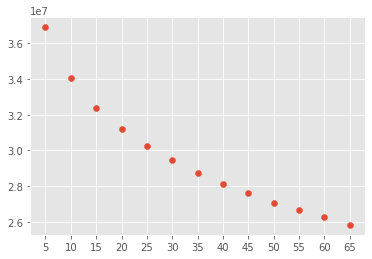

In [53]:
cluster_range = range(5, 70, 5)
find_best_k_for_kmeans(cluster_range, pca_result_2017)

In [63]:
kmeans = KMeans(n_clusters=6, n_jobs=-1, random_state=22)
kmeans.fit(pca_result_2017)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [64]:
groups_2017 = {}
for file, cluster in zip(filenames_2017, kmeans.labels_):
    if cluster not in groups_2017.keys():
        groups_2017[cluster] = []
        groups_2017[cluster].append(file)
    else:
        groups_2017[cluster].append(file)

In [65]:
frames_nums_and_clusters_2017 = [(value, key) for key in groups_2017.keys() for value in groups_2017[key]]

In [66]:
sorted_graph_axes_2017_1 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2017, '1')
sorted_graph_axes_2017_2 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2017, '2')
sorted_graph_axes_2017_3 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2017, '3')
sorted_graph_axes_2017_4 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2017, '4')
sorted_graph_axes_2017_5 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2017, '5')
sorted_graph_axes_2017_6 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2017, '6')
sorted_graph_axes_2017_7 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2017, '7')
sorted_graph_axes_2017_8 = frames_and_clusters_of_exact_series(frames_nums_and_clusters_2017, '8')

In [67]:
src_2017_1 = ['2017_frames/2017_1_{}.jpg'.format(i) for i in sorted_graph_axes_2017_1.keys()]
src_2017_2 = ['2017_frames/2017_2_{}.jpg'.format(i) for i in sorted_graph_axes_2017_2.keys()]
src_2017_3 = ['2017_frames/2017_3_{}.jpg'.format(i) for i in sorted_graph_axes_2017_3.keys()]
src_2017_4 = ['2017_frames/2017_4_{}.jpg'.format(i) for i in sorted_graph_axes_2017_4.keys()]
src_2017_5 = ['2017_frames/2017_5_{}.jpg'.format(i) for i in sorted_graph_axes_2017_5.keys()]
src_2017_6 = ['2017_frames/2017_6_{}.jpg'.format(i) for i in sorted_graph_axes_2017_6.keys()]
src_2017_7 = ['2017_frames/2017_7_{}.jpg'.format(i) for i in sorted_graph_axes_2017_7.keys()]
src_2017_8 = ['2017_frames/2017_8_{}.jpg'.format(i) for i in sorted_graph_axes_2017_8.keys()]

In [115]:
output_notebook()

first_series = ColumnDataSource(data=dict(
    
    x= list(sorted_graph_axes_2017_1.keys()),
    y= np.array(list(sorted_graph_axes_2017_1.values()))-0.29,
    desc=list(sorted_graph_axes_2017_1.keys()),
    imgs=src_2017_1,
    fonts = ['<i>1 episode</i>'] * len(src_2017_1)
))

second_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2017_2.keys()),
    y= np.array(list(sorted_graph_axes_2017_2.values()))-0.22,
    desc=list(sorted_graph_axes_2017_2.keys()),
    imgs=src_2017_2,
    fonts = ['<i>2 episode</i>'] * len(src_2017_2)
))

third_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2017_3.keys()),
    y= np.array(list(sorted_graph_axes_2017_3.values()))-0.15,
    desc=list(sorted_graph_axes_2017_3.keys()),
    imgs=src_2017_3,
    fonts = ['<i>3 episode</i>'] * len(src_2017_3)
))

forth_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2017_4.keys()),
    y= np.array(list(sorted_graph_axes_2017_4.values()))-0.05,
    desc=list(sorted_graph_axes_2017_4.keys()),
    imgs=src_2017_4,
    fonts = ['<i>4 episode</i>'] * len(src_2017_4)
))

fifth_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2017_5.keys()),
    y= np.array(list(sorted_graph_axes_2017_5.values()))+0.05,
    desc=list(sorted_graph_axes_2017_5.keys()),
    imgs=src_2017_5,
    fonts = ['<i>5 episode</i>'] * len(src_2017_5)
))

sixth_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2017_6.keys()),
    y= np.array(list(sorted_graph_axes_2017_6.values()))+0.15,
    desc=list(sorted_graph_axes_2017_6.keys()),
    imgs=src_2017_6,
    fonts = ['<i>6 episode</i>'] * len(src_2017_6)
))

seventh_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2017_7.keys()),
    y= np.array(list(sorted_graph_axes_2017_7.values()))+0.22,
    desc=list(sorted_graph_axes_2017_7.keys()),
    imgs=src_2017_7,
    fonts = ['<i>7 episode</i>'] * len(src_2017_7)
))

eightth_series = ColumnDataSource(data=dict(
    x= list(sorted_graph_axes_2017_8.keys()),
    y= np.array(list(sorted_graph_axes_2017_8.values()))+0.29,
    desc=list(sorted_graph_axes_2017_8.keys()),
    imgs=src_2017_8,
    fonts = ['<i><b>8 episode</b></i>'] * len(src_2017_8)
))

TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="187" alt="@imgs" width=333""
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
        </div>
        <div>
            <span style="font-size: 15px;">@fonts{safe}</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;  alpha: 0.25">($x, $y)</span>
        </div>
    </div>
"""

p = figure(plot_width=1000, plot_height=1100, tooltips=TOOLTIPS,
           title="Anna Karenina 2009")

p.circle('x', 'y', size=10, alpha=0.4, color='green', source=first_series)
p.circle('x', 'y', size=10, alpha=0.4, color='red', source=second_series)
p.circle('x', 'y', size=10, alpha=0.4, color='blue', source=third_series)
p.circle('x', 'y', size=10, alpha=0.4, color='gold', source=forth_series)
p.circle('x', 'y', size=10, alpha=0.4, color='pink', source=fifth_series)
p.circle('x', 'y', size=10, alpha=0.4, color='grey', source=sixth_series)
p.circle('x', 'y', size=10, alpha=0.4, color='brown', source=seventh_series)
p.circle('x', 'y', size=10, alpha=0.4, color='orange', source=eightth_series)

show(p)

Loading BokehJS ...

# 2013 год

## Получение даты

In [12]:
path_2013 = '/Users/tonleon/Desktop/Diploma/2013_cropped'
data_2013, feat_2013, filenames_2013 = get_image_features(path_2013, model)

100%|██████████| 12105/12105 [1:33:55<00:00,  2.15it/s]


In [14]:
pd.DataFrame(np.concatenate(list(data_2013.values())), index=data_2013.keys()).to_csv("/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2013/Features_2013.csv")

In [13]:
with open("/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2013_cropped/Features_2013.csv", "w") as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in data_2013.items():
        writer.writerow([key, value])  

In [14]:
pca_2013 = PCA(n_components=150, random_state=22)
pca_2013.fit(feat_2013)
pca_result_2013 = pca_2013.transform(feat_2013)

savetxt('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2013/PCA_2013.csv', pca_result_2013, delimiter=',')

Working on clusters number equal to 5...
Working on clusters number equal to 10...
Working on clusters number equal to 15...
Working on clusters number equal to 20...
Working on clusters number equal to 25...
Working on clusters number equal to 30...
Working on clusters number equal to 35...
Working on clusters number equal to 40...
Working on clusters number equal to 45...
Working on clusters number equal to 50...
Working on clusters number equal to 55...
Working on clusters number equal to 60...
Working on clusters number equal to 65...


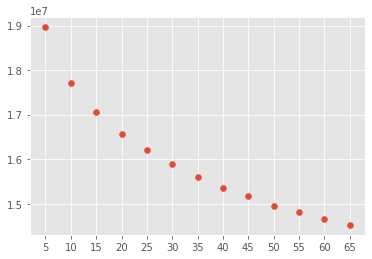

In [120]:
cluster_range = range(5, 70, 5)
find_best_k_for_kmeans(cluster_range, pca_result_2013)

In [121]:
groups_2013, graph_axes_ordered_2013, kmeans_2013 = separate_frames_2_clusters(pca_result_2013, filenames_2013, N=9)

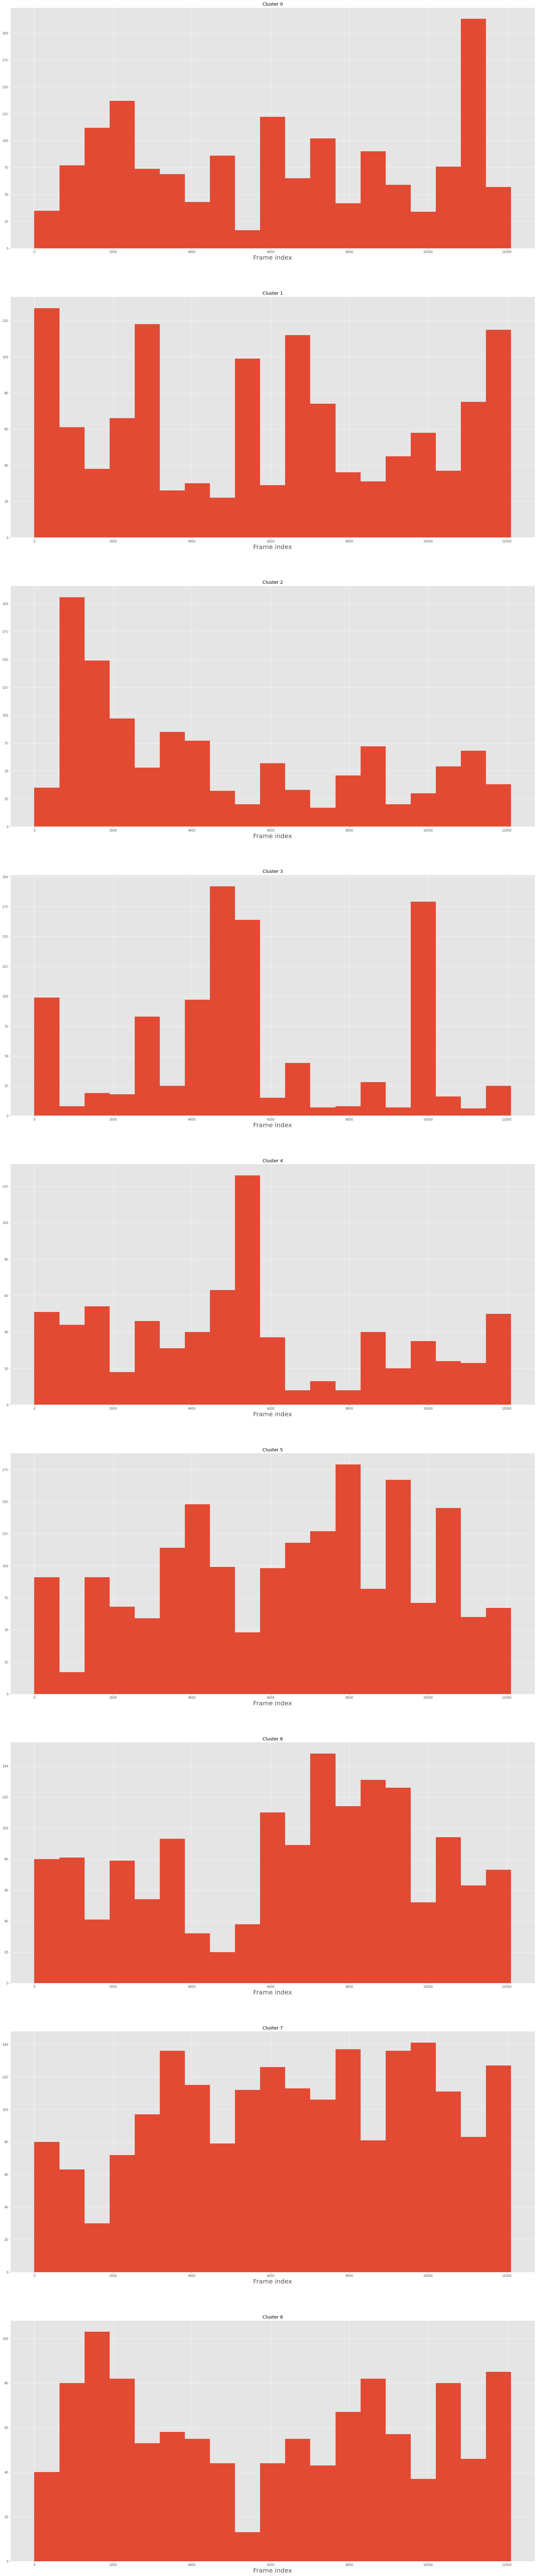

In [122]:
plot_hist_of_cluster_distribution(groups_2013, kmeans_2013, n_of_subplots=9, bins_num=20)

In [123]:
src_2013 = ['2013_frames/{}_frame.jpg'.format(i) for i in graph_axes_ordered_2013.keys()] 
visualize_clusters(graph_axes_ordered_2013, src_2013, "Anna Karenina 2013", 20)

Loading BokehJS ...

Loading BokehJS ...

In [124]:
visualize_clusters_in_line(graph_axes_ordered_2013, src_2013, "Anna Karenina 2013", each_n_frame=14)

Loading BokehJS ...